2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# The dataset

## File descriptions


* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column



## Data fields


Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.



## Metric


Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)



## Submission File Format


The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook


This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

## <div class="alert alert-danger"><h1 style="text-align:center;font-size:100%;">Let the fun begin!</h1><br></div>



###  <a id='ILaNA'></a> <div style="font-size:120%;  margin-left: 25px;"> <span class="label label-success"> Importing Libraries and notebook adjustment</span></div>

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(color_codes=True)
import xgboost as xgb
import category_encoders as ce
import sklearn
import scipy
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from scipy import stats
from scipy.stats import norm, skew 
from scipy.cluster import hierarchy as hc
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression 

###  <a id='R'></a> <div style="font-size:120%;  margin-left: 25px;"> <span class="label label-success"> REFERENCES</span></div>


<div class='alert alert-info'>

https://en.wikipedia.org/wiki/Generalized_linear_model<br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques<br><br>

<b>Missing values imputation:</b><br>
http://www.stat.columbia.edu/~gelman/arm/missing.pdf <br><br>

<b>Label encoding of categorical data:</b><br>
https://www.w3schools.com/bootstrap/bootstrap_badges_labels.asp<br>
https://www.moresteam.com/WhitePapers/download/dummy-variables.pdf<br>
http://pbpython.com/categorical-encoding.html<br>
https://stats.idre.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/#HELMERT<br><br>

<b>Collapsible Headings extension:</b><br>
https://ndres.me/post/best-jupyter-notebook-extensions/<br><br>

<b>k-fold cross validation:</b><br>
https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/<br><br>

<b>XGBoost parameters:</b><br>
http://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

</div>

In [6]:
%%html
#center the figures in the notebook
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>



## <a id='I'></a><h2 style="text-align=center; font-size=220">  <span class="label label-info" style="text-align=center;"> I. Overview of our Data</span>  </h2> 

###  <a id='I.1'></a> <div style="font-size:120%;  margin-left: 25px;"> <span class="label label-success">I.1</span>  <span class="label label-success"> Loading data as a dataframe</span></div>



<div class='alert alert-info'>
To start with, we load train and test data into dataframes `train_df` and `test_df` respectively, using pandas' `read_csv` function.<br>
The columns of the `train_df` and `test_df` are then sorted alphabetically: leaving the columns `Id` and `SalePrice` untouched.<br> 
Sorting is done in order to make referencing and analysis of data columns simpler during searches which inturn are done during understanding and interpretation.<br>
We then identify qualitative and quantitative feature columns in the training data. 
</div>

In [7]:
#base_path = '/root/work/challenge_data/'
base_path = '/mnt/workspace/challenge_data/'
#base_path = '/Users/ramzimissaoui/Documents/ComputerScienceUniverse/Eurecom/cours/2ndSemester/AML/labs2018/challenge/challenge_data/'

train_csv = base_path+"train.csv"
test_csv = base_path+"test.csv"

train_df = pd.read_csv(train_csv)
test_df=pd.read_csv(test_csv)

# Sorting all columns alphabetically, except which Id stays at the beginning and SalePrice which stays at the end 
ordered_col_names = ['Id'] + sorted(train_df.columns[1 :-1]) +['SalePrice']
train_df = train_df[[feature for feature in ordered_col_names]]

# Excluding the SalePrice column from the ordered list, as test_df does not have SalePrice
test_df = pd.read_csv(test_csv)[[feature for feature in ordered_col_names[:-1]]]
#categorical features columns
qualitative = [f for f in train_df.columns if train_df.dtypes[f] == 'object']
#numerical features columns
quantitative = [f for f in train_df.columns if train_df.dtypes[f] != 'object']


<div class='alert alert-info'>
Understanding train and test data layouts:
</div>

In [8]:
#the size of the training data
print("We have",train_df.shape[0],"training rows")
#the size of the test data
print("We have",test_df.shape[0],"testing rows")

We have 1200 training rows
We have 260 testing rows


In [9]:
#Check if test columns equal train columns
print(test_df.columns == train_df.columns[:-1])


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


### <a id='I.2'></a> <div style="font-size:120%;   margin-left: 25px;"> <span class="label label-success">I.2</span>  <span class="label label-success"> Data inspection </span></div>

<div class='alert alert-info'>
Displaying a sample of 5 records from the train dataset:
</div>

In [10]:
#display data samples
train_df.head(5)

Id  1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0   1       856       854          0   NaN             3     1Fam       TA   
1   2      1262         0          0   NaN             3     1Fam       TA   
2   3       920       866          0   NaN             3     1Fam       TA   
3   4       961       756          0   NaN             3     1Fam       Gd   
4   5      1145      1053          0   NaN             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1    ...     ScreenPorch Street TotRmsAbvGrd  \
0           No         706    ...               0   Pave            8   
1           Gd         978    ...               0   Pave            6   
2           Mn         486    ...               0   Pave            6   
3           No         216    ...               0   Pave            7   
4           Av         655    ...               0   Pave            9   

   TotalBsmtSF  Utilities WoodDeckSF  YearBuilt YearRemodAdd YrSold SalePrice  
0          856     AllPub          0       2003         2003   2008    208500  
1         1262     AllPub        298       1976         1976   2007    181500  
2          920     AllPub          0       2001         2002   2008    223500  
3          756     AllPub          0       1915         1970   2006    140000  
4         1145     AllPub        192       2000         2000   2008    250000  

[5 rows x 81 columns]

<div class='alert alert-info'>
Obtaining the list of feature columns present in the train and test set:
</div>

In [11]:
#data columns
print("The training data contains", train_df.columns.size,"columns")
print("The test data contains", test_df.columns.size,"columns","\n")

print ("{: ^100s}".format("The column names - train_df"))
print ("{: ^100s}".format("--------------------"))
print (', '.join(list(train_df.columns)))
print("\n")
print ("{: ^100s}".format("The column names - test_df"))
print ("{: ^100s}".format("--------------------"))
print (', '.join(list(test_df.columns)))

The training data contains 81 columns
The test data contains 80 columns 

                                    The column names - train_df                                     
                                        --------------------                                        
Id, 1stFlrSF, 2ndFlrSF, 3SsnPorch, Alley, BedroomAbvGr, BldgType, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, CentralAir, Condition1, Condition2, Electrical, EnclosedPorch, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Fireplaces, Foundation, FullBath, Functional, GarageArea, GarageCars, GarageCond, GarageFinish, GarageQual, GarageType, GarageYrBlt, GrLivArea, HalfBath, Heating, HeatingQC, HouseStyle, KitchenAbvGr, KitchenQual, LandContour, LandSlope, LotArea, LotConfig, LotFrontage, LotShape, LowQualFinSF, MSSubClass, MSZoning, MasVnrArea, MasVnrType, MiscFeature, MiscVal, MoSold, Neighborhood, OpenPorchSF, Overa

<div class='alert alert-info'>
<b>Understanding the effect of feature columns on `SalePrice`:</b><br>
We begin by understanding the datatype of columns as either numerical (quantitative: `int64` or `float64`) or categorical (qualitative: `object`).<br>
In order to further analyze `SalePrice` as a function of these features, we maintain these two types of columns in separate dataframes: `numerical_df` and `categorical_df`. 
</div>

In [12]:
train_df.dtypes.value_counts()
floats_train_df = train_df.select_dtypes(include=['float64'])
print('Columns of datatype float64 are:\n', floats_train_df.columns)

Columns of datatype float64 are:
 Index(['GarageYrBlt', 'LotFrontage', 'MasVnrArea'], dtype='object')


<div class='alert alert-warning'>
<div class="label label-warning">COMMENT:</div><br>
Although the columns ['`GarageYrBlt`', '`LotFrontage`', '`MasVnrArea`'] are actually integers in the given dataset (understood by observing the training data file), their datatype in the dataframe is `float64`. <br>
This is because, these columns have `NA` as value for certain houses. <br>
In pandas dataframes, integer columns cannot have `NA` as values; therefore these are automatically typed to be `float64`.
</div>

In [13]:
#Selecting only the numerical columns
numerical_df = train_df.select_dtypes(include=['float64','int64'])

# Categorical Features DF
# Object Features
categorical_features = train_df.dtypes[train_df.dtypes == 'object'].index
categorical_df = train_df[categorical_features]


In [14]:
# Printing Numerical Columns
print("We have", numerical_df.columns.size,"numerical columns")
print ("{: ^100s}".format("The numerical columns names"))
print ("{: ^100s}".format("--------------------"))
print (', '.join(list(numerical_df.columns)))

# Printing Categorical Columns
print("\n\nWe have", categorical_df.columns.size,"categorical columns")
print ("{: ^100s}".format("The categorical columns names"))
print ("{: ^100s}".format("--------------------"))
print (', '.join(list(categorical_df.columns)))

We have 38 numerical columns
                                    The numerical columns names                                     
                                        --------------------                                        
Id, 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold, SalePrice


We have 43 categorical columns
                                   The categorical columns names                                    
                                        --------------------                                        
Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, C

<div class="alert alert-warning">
<div class="label label-warning">INFERENCE:</div><br>
<li>Our training data contains 81 columns among them we have 38 of numerical type</li>
<li>We can trust the training data as their columns are equal to those of the training data.</li>
</div>

### <a id='I.3'></a> <div style="font-size:120%;  margin-left: 25px;"> <span class="label label-success">I.3</span>  <span class="label label-success"> Descriptive statistics </span></div>

<div class='alert alert-info'>
The target: `SalePrice` <br>
Descriptive statistics of `SalePrice`:  
</div>

In [15]:
#statistics about 'SalePrice'
train_df['SalePrice'].describe()

count      1200.000000
mean     181414.628333
std       81070.908544
min       34900.000000
25%      129900.000000
50%      163700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

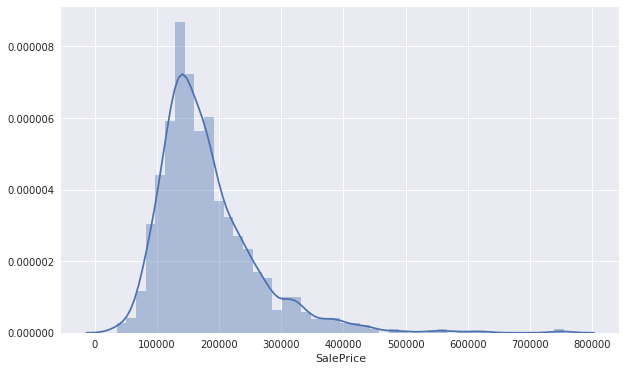

In [16]:
#histogram
#sns.distplot(train_df['SalePrice'])
sp_df=train_df['SalePrice']
a4_dims = (10, 6)
fig, ax = plt.subplots(figsize=a4_dims)

#histogram of the SalePrice without log transformation
sns.distplot(sp_df,ax=ax);


In [17]:
# Skewness and Kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.967215
Kurtosis: 7.033907


<div class='alert alert-warning'>
<div class="label label-warning">INFERENCE:</div><br>
We can see that the distribution of `SalePrice` deviates form the normal distribution in that it is skewed to the left, with a skewness=1.9672, with a long right tail.<br><br>
**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry.<br>
The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.<br> 
Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right.<br>
By skewed left, we mean that the left tail is long relative to the right tail. Similarly, skewed right means that the right tail is long relative to the left tail.
<br>

 
<br><br>
Also we observe a high positive value of Kurtosis (=7.033), for the distribution of `SalePrice`, and this implies the existence of outliers in the dataset.<br><br>
**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.<br>
That is, data sets with high kurtosis tend to have heavy tails, or outliers.<br> 
Data sets with low kurtosis tend to have light tails, or lack of outliers.<br>

The Pandas DataFrame.kurt() function uses the Fisher's definition of kurtosis ('excess kurtosis') which considers the kurtosis of standard normal distribution to be zero.<br>
With this definition, positive kurtosis indicates a "heavy-tailed" distribution and negative kurtosis indicates a "light tailed" distribution.<br>
<br><br>

We will use later on a log transformation, to transform `SalePrice` to ones that are singlepeaked and symmetric. <br>Its most important feature is that, relatively, it moves big values closer together while it moves small values farther apart. Also, it is easier to describe the relationship between variables when it’s approximately linear. In order to treat the data of sale price up to hundred thousand dollars, log transformation works well in modeling.<br>
Below is a plot of the distribution of `SalePrice` with a log transformation.
</div>


 mu = 12.02 and sigma = 0.40



Text(0.5,1,'SalePrice distribution')

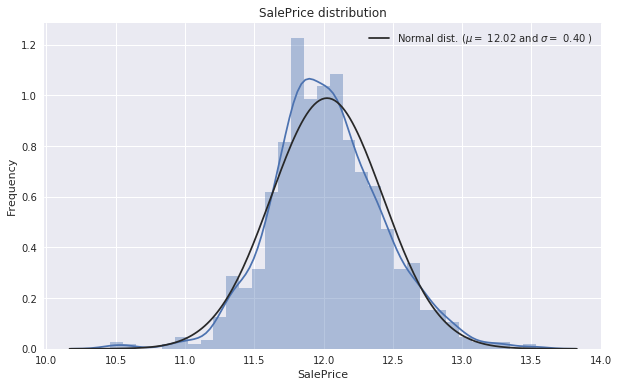

In [18]:
#histogram
#sns.distplot(train_df['SalePrice'])
sp_df=np.log(train_df['SalePrice'])
a4_dims = (10, 6)
fig, ax = plt.subplots(figsize=a4_dims)

#histogram of the SalePrice with log transformation
sns.distplot(sp_df,ax=ax, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(sp_df)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

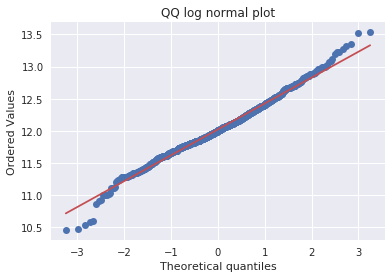

In [19]:
#See also the QQ-plot
fig = plt.figure()
res = stats.probplot(sp_df, plot=plt)
plt.title("QQ log normal plot")
plt.show()


<div class="label label-info" style="font-size:100%;">Analysis of Columns with Numerical Values:</div><br><br>
<div class='alert alert-info'>
Certain columns/features that are considered as numerical are not intrinsically numerical by usage.<br>
As an example, consider the column: `MSSubClass`: which identifies the type of dwelling involved in the sale.<br>

The possible values for this column and their corresponding meaning are:<br><br>

       20 	1-STORY 1946 & NEWER ALL STYLES<br>
        30	1-STORY 1945 & OLDER<br>
        40	1-STORY W/FINISHED ATTIC ALL AGES<br>
        45	1-1/2 STORY - UNFINISHED ALL AGES<br>
        50	1-1/2 STORY FINISHED ALL AGES<br>
        60	2-STORY 1946 & NEWER\<br>
        70	2-STORY 1945 & OLDER\<br>
        75	2-1/2 STORY ALL AGES\<br>
        80	SPLIT OR MULTI-LEVEL\<br>
        85	SPLIT FOYER\<br>
        90	DUPLEX - ALL STYLES AND AGES\<br>
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER\<br>
       150	1-1/2 STORY PUD - ALL AGES\<br>
       160	2-STORY PUD - 1946 & NEWER\<br>
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER<br>
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES |<br>

Therefore it is not logical to consider these numbers as actual integers during computations of covariance.
Since these are apparently IDs for each value of the feature, this feature should be considered as categorical.
<br><br>
The two columns `MSSubClass` and `OverallCond` which existe as numerical columns in the dataset when analysed, are really assigned numbers that represent a category that they belong to or a feature that they comprise of.

So, essentially, these columns need to be treated as Categorical and then encoded for further analysis.
<br>
Consider the column `OverallQual`: which rates the overall material and finish of the house.
(similarly `OverallCond` which rates the overall condition of the house) 
The possible values for these two columns are:<br><br>
       
       10	Very Excellent<br>
       9	Excellent<br>
       8	Very Good<br>
       7	Good<br>
       6	Above Average<br>
       5	Average<br>
       4	Below Average<br>
       3	Fair<br>
       2	Poor<br>
       1	Very Poor<br>
<br>These type of features are called ordinal features. <br>
The values logically measure the quality by ratings. A good rating has a higher numerical value and a bad rating has a lower value.
Therefore these can safely be considered for numerical computations of covariance with `SalePrice` as well.
</div>

<div class='alert alert-info'>
We now analyse the dependencies between features (numerical); more importantly, the relationship of `SalePrice` with features by using a heatmap of the correlation matrix between numerical features.
</div>

Text(0.5,1,'Heatmap for the correlation matrix between numerical features ')

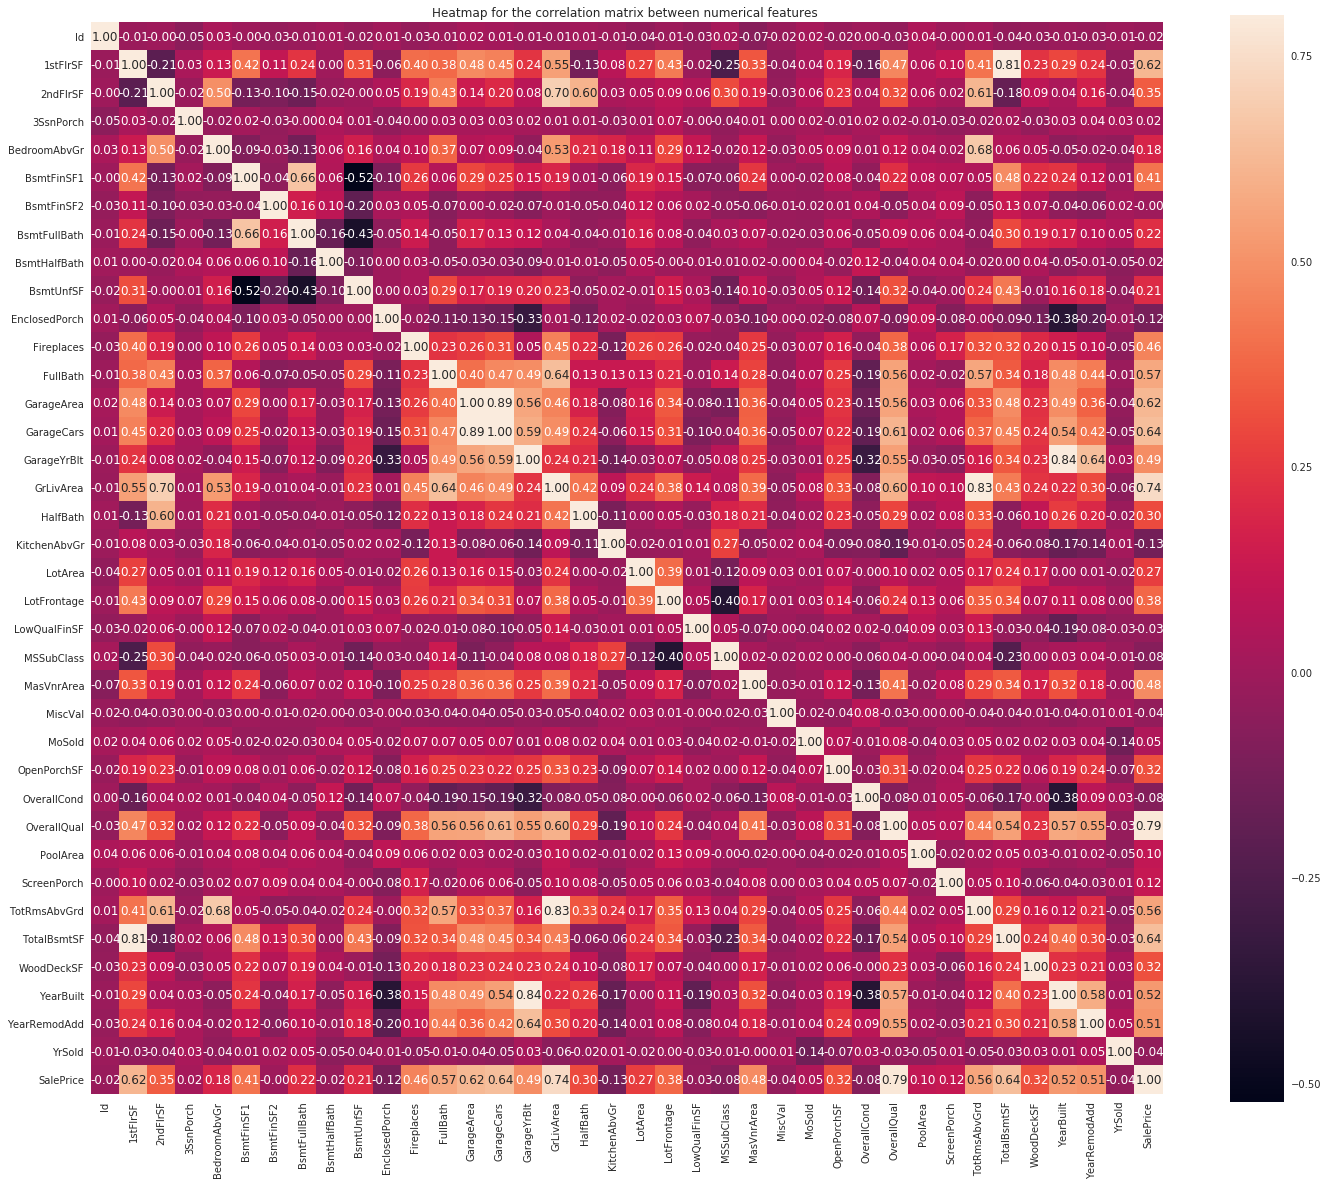

In [20]:
corr_mat = train_df.corr()
imp= corr_mat ['SalePrice']> 0.5 

f, ax = plt.subplots(figsize = (24,20))
sns.heatmap(corr_mat, annot=True, fmt='.2f', vmax = 0.8, square=True) #cmap='Blues'
ax.set_title('Heatmap for the correlation matrix between numerical features ')

<div class='alert alert-warning'>
<div class="label label-warning">INFERENCE:</div><br>
Considering features that have a correlation coefficient > 0.5 (which is the correlation coefficient value for a moderate uphill relation)  with `SalePrice` as features that significantly affect the `SalePrice`. 
<br>
<div class="label label-success">Note:</div> This correlation matrix takes into consideration only columns with numerical values in the given dataset.

</div>

In [21]:
# Extracting columns of numerical features that have a correlation coefficient > 0.5 with SalePrice
imp_num_feats = list((corr_mat['SalePrice'] > 0.5)[imp == True].index)

# Excluding the last column: which is SalePrice itself
imp_num_feats=imp_num_feats[:-1]

print ("{: ^100s}".format("Important numerical features that affect the SalePrice are:"))
print ("{: ^100s}".format("--------------------"))
print ('|'.join(list(imp_num_feats)))
print("\n")
print("{: ^100s}".format('Number of important features:'))
print ("{: ^100s}".format("--------------------"))
print("{: ^100s}".format(str(len(imp_num_feats))))

                    Important numerical features that affect the SalePrice are:                     
                                        --------------------                                        
1stFlrSF|FullBath|GarageArea|GarageCars|GrLivArea|OverallQual|TotRmsAbvGrd|TotalBsmtSF|YearBuilt|YearRemodAdd


                                   Number of important features:                                    
                                        --------------------                                        
                                                 10                                                 


<div class='alert alert-warning'>
<div class="label label-warning">INFERENCE:</div><br>
Among the numerical features, we see that the above list contains most of the features which are in the list of top-10 features that house hunters look for while buying a house.

<table>
<th>Feature</th><th>Description</th>
<tr><td>`1stFlrSF`</td><td>First Floor Square Feet</td></tr> 
<tr><td>`FullBath`</td><td>Full Bathrooms above grade</td></tr>
<tr><td>`GarageArea`</td><td>Size of garage in sq.ft.</td></tr>
<tr><td>`GarageCars`</td><td>Size of garage in car capacity</td></tr>
<tr><td>`GrLivArea`</td><td>Above grade (ground) living area sq.ft.</td></tr>
<tr><td>`OverallQual`</td><td>Rates the overall material and finish of the house</td></tr>
<tr><td>`TotRmsAbvGrd`</td><td>Total rooms above grade (excluding bathrooms)</td></tr>
<tr><td>`TotalBsmtSF`</td><td>Total sqft of basement area</td></tr>
<tr><td>`YearBuilt`</td><td>Original construction date</td></tr>
<tr><td>`YearRemodAdd`</td><td>Remodel date (same as construction date if no remodeling or additions)</td></tr>
</table>
</div>

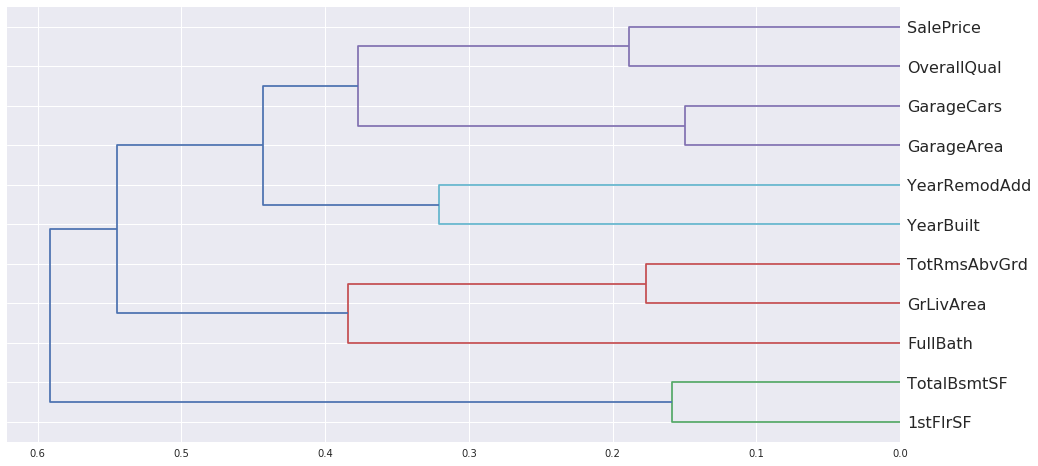

In [22]:
#important features for the dendrogram
imp_features=imp_num_feats+['SalePrice']
#computing the Spearman’s Rank Correlation coefficient
corr=np.round(scipy.stats.spearmanr(train_df[imp_features]).correlation, 4)
corr_condensed=hc.distance.squareform(1-corr)
z=hc.linkage(corr_condensed, method='average')
#plotting the dendrogram
fig=plt.figure(figsize=(16,8))
dendrogram= hc.dendrogram(z, labels=imp_features, orientation='left', leaf_font_size=16)

<div class='alert alert-warning'>
<div class="label label-warning">INFERENCE:</div><br>
The graph above is a dendrogram we used to find out if there are features which are highly correlated and redundant. These can be removed to reduce overfitting further. <br>
The point at which two features join is the Spearman’s Rank Correlation coefficient between them. Lower the value, higher the correlation.
</div>

<div class='alert alert-info'>

Analysing `SalePrice` as a function of each feature:

</div>

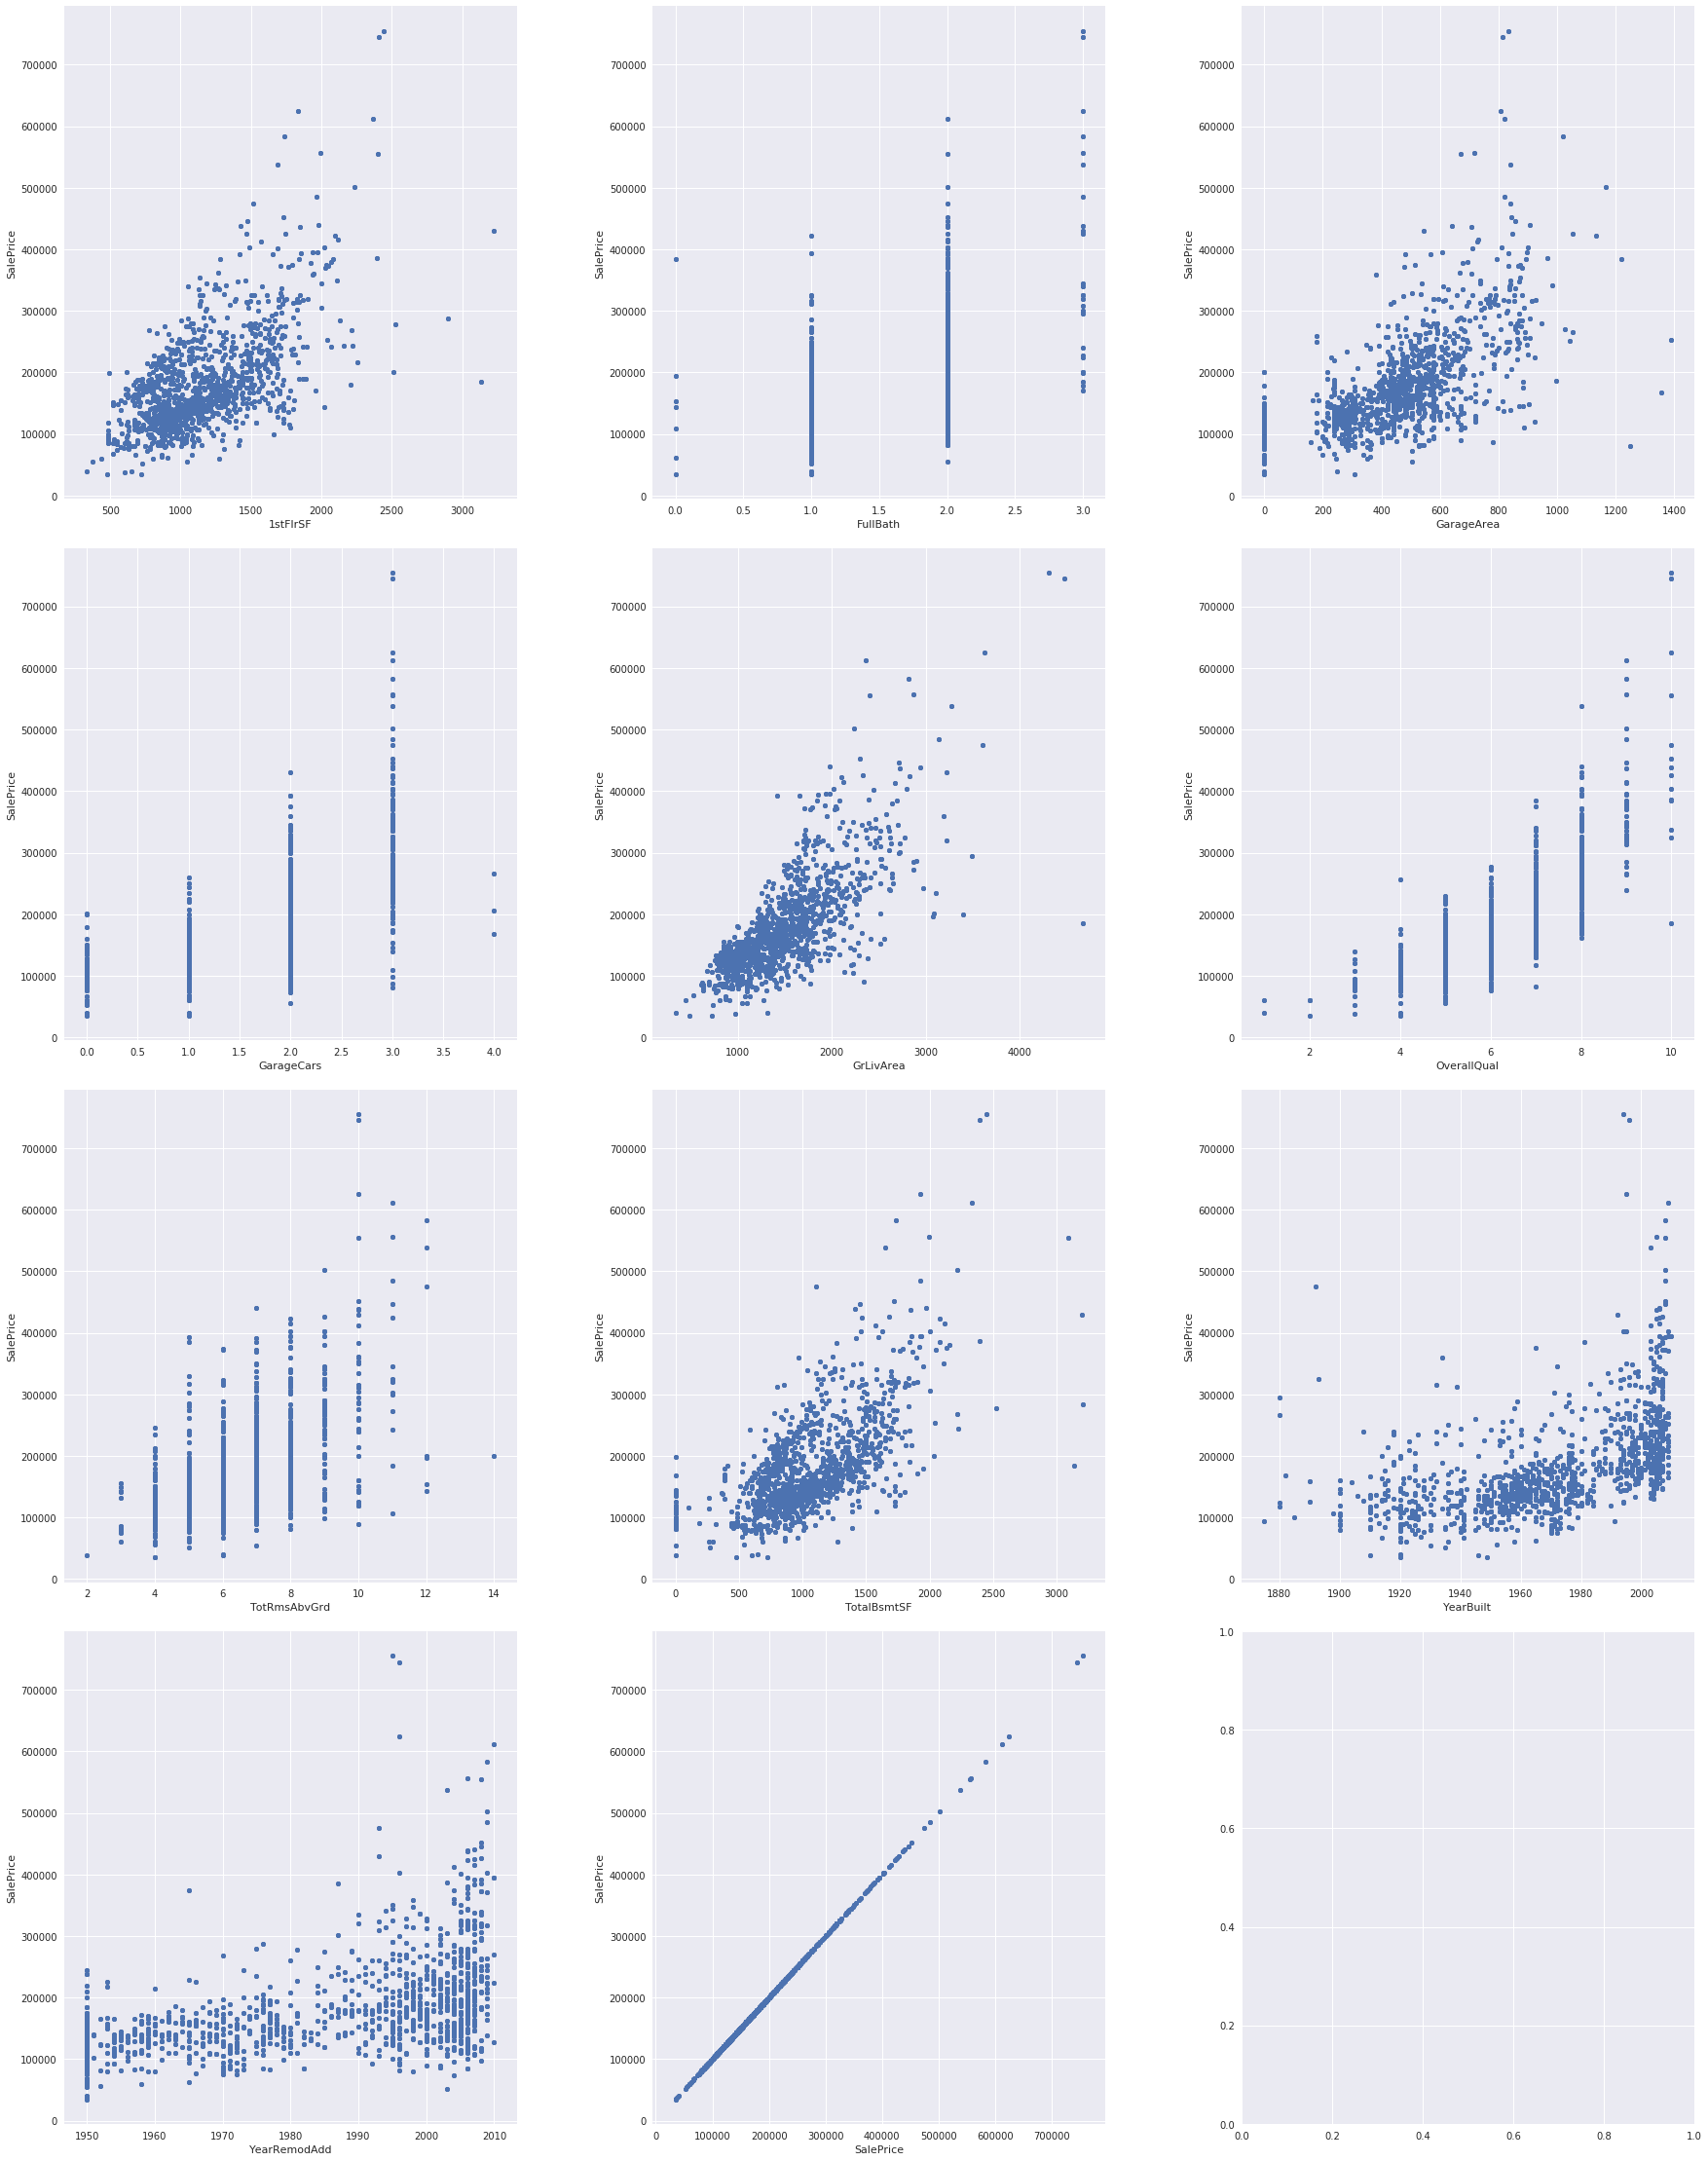

In [23]:
# Scatter plot for the important numerical features identified above
data = train_df[imp_num_feats+['SalePrice']]

fig, axs = plt.subplots(4,3, figsize = (30,40))

fig.subplots_adjust(hspace=.1, wspace=.3)

for k in axs:
    for i,j in zip(data, axs.flat):
        data.plot(x=i, y='SalePrice', kind='scatter', ax=j)

plt.show()

<div class='alert alert-warning'>
<div class="label label-warning">INFERENCE:</div><br>
As observed in the correlation heatmap previously, the important numerical features have a positive correlation coefficient with `SalePrice`.<br>
This can also be observed from the scatter plots above which indicate that the numerical features listed above positively affect `SalePrice`; in that, an increase in the value of any of these features would cause the `SalePrice` to be higher as well.<br><br>
The histogram plots below enable in visualizing the distributions of important numerical features that impact our target variable `SalePrice`.
</div>

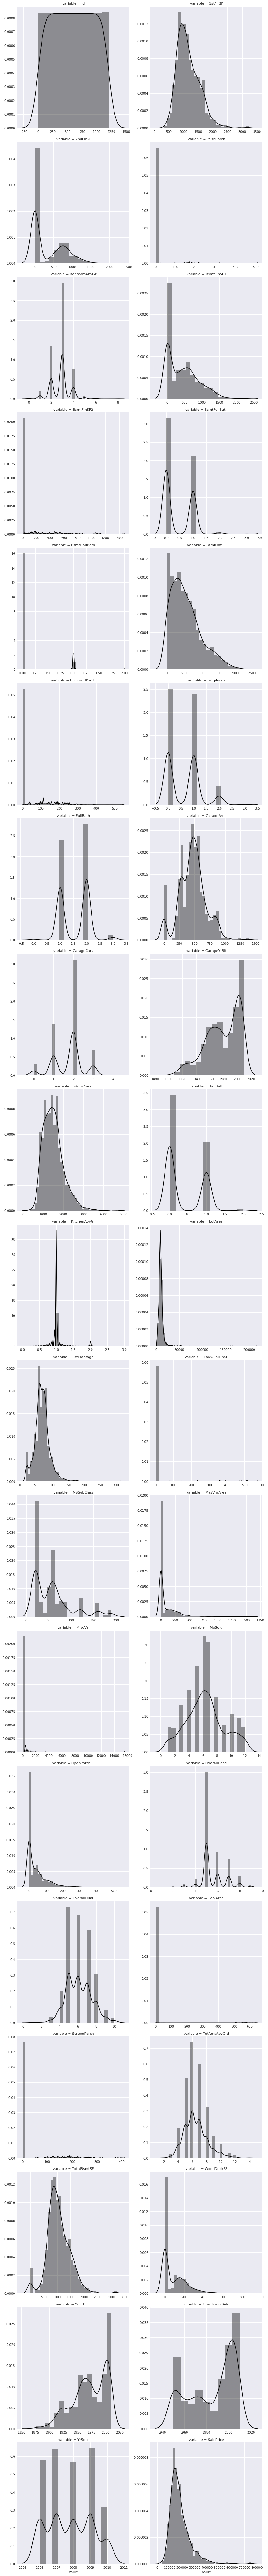

In [24]:
#Another code to plot numerical features
f = pd.melt(train_df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=6)
g = g.map(sns.distplot, "value", color="black")


<div class="alert alert-warning">
<div class="label label-warning">INFERENCE:</div><br>
We can see from the picture above that most of the numerical features are skewed to the left which makes them good candidates for log transformation : 
<ul>
<li>TotalBsmtSF
<li>KitchenAbvGr, 
<li>LotFrontage, 
<li>LotArea
<li>1rstFlrSF
</ul><br>
    While ganining on regression transformation it will smooth out some irregularities which could be important like large amount of houses with 0 2ndFlrSF. Such irregularities are good candidates for feature construction.<br>
    We will apply the tranformation after filling the NAs later in the notebook.

</div>

## <a id='II.'></a> <h2 style="text-align=center; font-size=240"> <span class="label label-info" style="text-align=center;" >II</span>  <span class="label label-info" style="text-align=center;"> Data cleaning and pre-processing </span>  </h2> 

### <a id='II1'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">II.1</span> <span class="label label-success">Removing highly correlated features</span></div>



<div class='alert alert-info'>
Let's select the high correlations  which are over 0.80 
</div>

Text(0.5,1,'Heatmap for the correlation matrix between numerical features ')

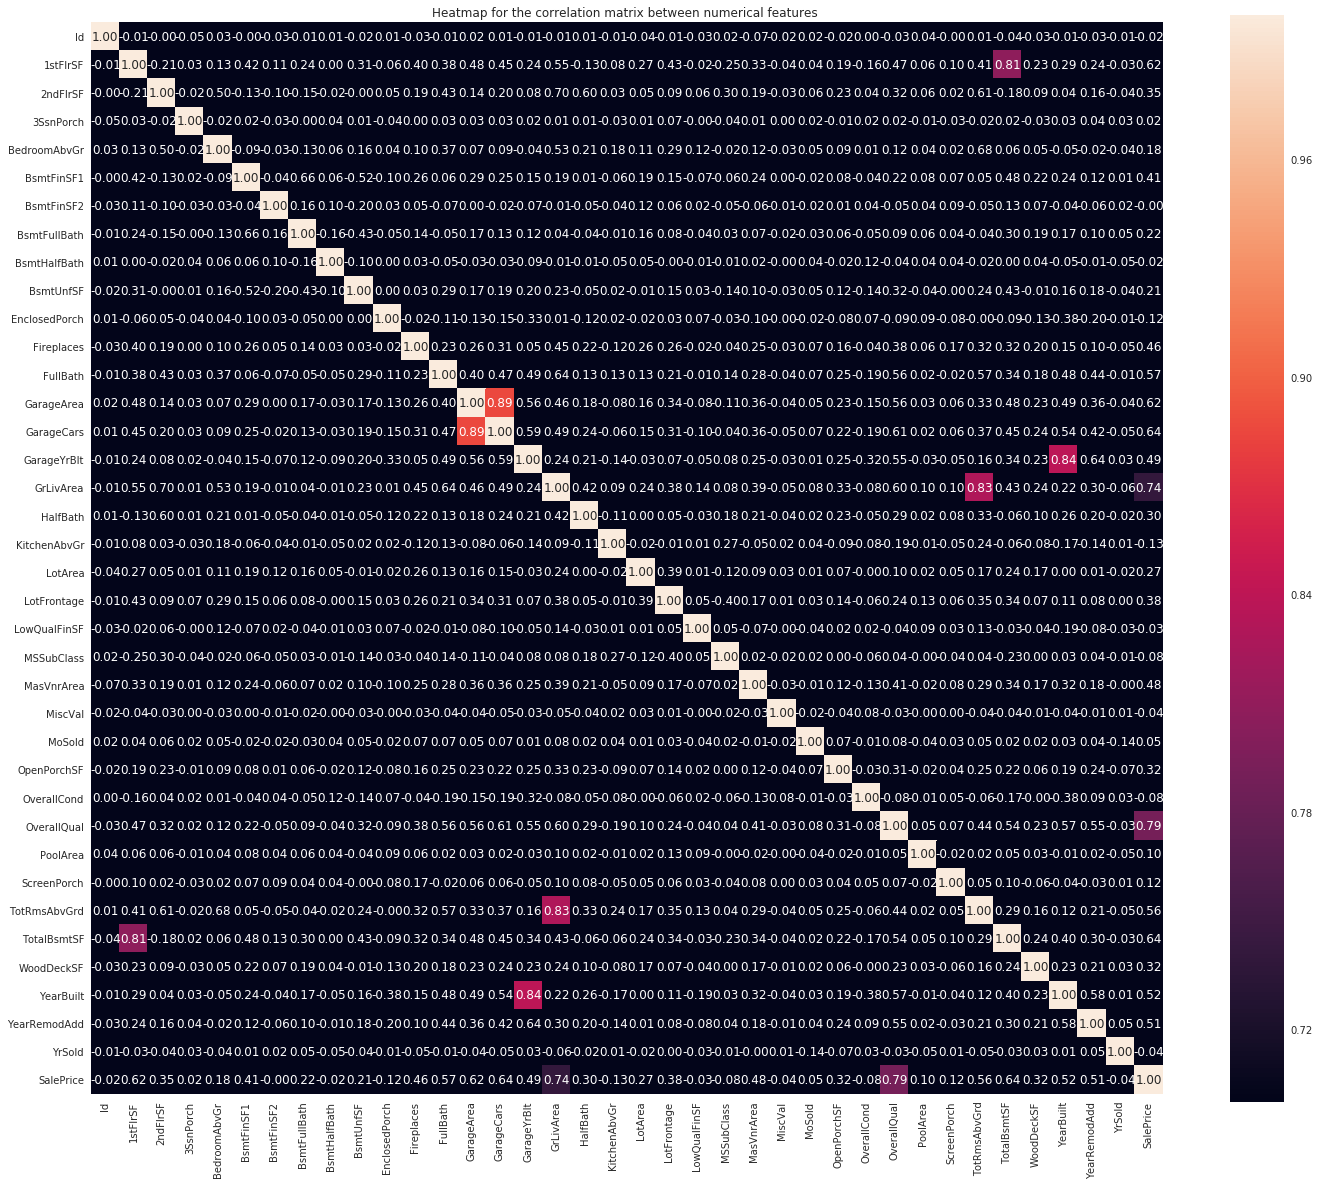

In [25]:
corr_mat = train_df.corr()

f, ax = plt.subplots(figsize = (24,20))
sns.heatmap(corr_mat, annot=True, fmt='.2f', vmax = 1, vmin=0.70, square=True) #cmap='Blues'
ax.set_title('Heatmap for the correlation matrix between numerical features ')

<div class="alert alert-warning">
<div class="label label-warning">INFERENCE:</div>
<br>
 There are some features that have high correlation:
<li>`GarageCars` and `GarageArea` have .89 correlation</li>
<li>`GrLivArea` and `TotRmsAbvGrd` have .83 correlation</li>
<li>`TotalBsmtSF` and `1stFlrSF` have .81 correlation</li>
<li>`YearBuilt` and `GarageYrBlt` have .84 correlation</li>
</div>




In [26]:
rm_columns = ['1stFlrSF', 'GarageYrBlt','TotRmsAbvGrd','GarageArea']
train_df.drop(rm_columns, axis = 1, inplace = True)
test_df.drop(rm_columns, axis = 1, inplace = True)

<div class="alert alert-warning">
<div class="label label-warning">INFERENCE:</div> <strong>Why should we remove the highly correlated features?</strong>
<br><br>

<li>In our situation, we have four independent couple variables that are very highly correlated, we definitely should remove one of the two variables in each couple because otherwise we'll run into the multicollinearity confusion and our regression model's regression coefficients related to the two highly correlated variables will be unreliable.</li>
<br>
<li>In addition, if two variables are highly correlated they will obviously bring nearly exactly the same information to our regression model. But, by including both we are actually weakening the model by adding useless information which can be considered as noise.</li>


</div>





### <a id='II2'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">II.2</span> <span class="label label-success">Outliers</span></div>





<div class='alert alert-info'>
Observing the scatter plots for numerical features we noticed that `GrLivArea`has an outlier which has a `SalePrice`less than 200000 and a value greater than 4000.
<br>Below is the isolated scatter for that numerical feature, after which we further continue the process of identifying the outlier data record for handling it suitably (removal in this case; to prevent the outlier from improperly influencing training/ prediction).
</div>

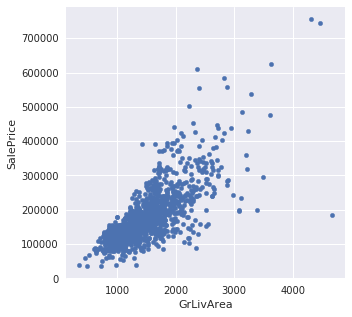

In [27]:
# Scatter plot for TotalSq feature
data = train_df[['GrLivArea','SalePrice']]

fig, axs = plt.subplots(1,1, figsize = (5,5))
data.plot(x='GrLivArea', y='SalePrice', kind='scatter', ax=axs)

plt.show()

In [28]:
#identifying the id of the outlier
print(train_df[train_df['GrLivArea']>4000][['GrLivArea','SalePrice']])

      GrLivArea  SalePrice
523        4676     184750
691        4316     755000
1182       4476     745000


<div class="alert alert-warning">
the outlier's id is `523`. 
</div>

In [29]:
#dropping the outlier
train_df=train_df.drop(train_df.index[523])

In [30]:
#checking 
print(train_df[train_df['GrLivArea']>4000][['GrLivArea','SalePrice']])

      GrLivArea  SalePrice
691        4316     755000
1182       4476     745000


### <a id='II.3'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">II.3</span> <span class="label label-success">Missing Data</span></div>


####   <div style="font-size:120%;margin-left: 50px;"><a id='II.3.1'></a> <span class="label label-danger">II.3.1</span> <span class="label label-danger">Statistics and visualization</span></div>

<div class='alert alert-info'>

Identifying and visualizing columns containing `NA`, `Null`in train and test dataframes:

</div>

In [31]:
#percentage of missing data in all features in the training data
train_all_columns = (train_df.isnull().sum() / len(train_df)) * 100

#select features that have at least one empty value
train_miss_columns = train_all_columns.drop(train_all_columns[train_all_columns == 0].index).sort_values(ascending=False)
train_missing_data = pd.DataFrame({'train%' :train_miss_columns})

#percentage of missing data in all features in the test data
test_all_columns = (test_df.isnull().sum() / len(test_df)) * 100

#select features that have at least one empty value
test_miss_columns = test_all_columns.drop(test_all_columns[test_all_columns == 0].index).sort_values(ascending=False)
test_missing_data = pd.DataFrame({'test%' :test_miss_columns})

pd.concat([train_missing_data,test_missing_data],axis=1).sort_values(by=['test%','train%'], ascending=False)


train%      test%
PoolQC        99.666389  98.846154
MiscFeature   96.080067  97.307692
Alley         93.744787  93.846154
Fence         81.067556  79.230769
FireplaceQu   47.039199  48.461538
LotFrontage   17.514595  18.846154
GarageCond     5.587990   5.384615
GarageFinish   5.587990   5.384615
GarageQual     5.587990   5.384615
GarageType     5.587990   5.384615
BsmtExposure   2.752294   1.923077
BsmtFinType2   2.752294   1.923077
BsmtCond       2.668891   1.923077
BsmtFinType1   2.668891   1.923077
BsmtQual       2.668891   1.923077
MasVnrArea     0.500417   0.769231
MasVnrType     0.500417   0.769231
Electrical          NaN   0.384615

Text(0.5,1,'missing data by feature')

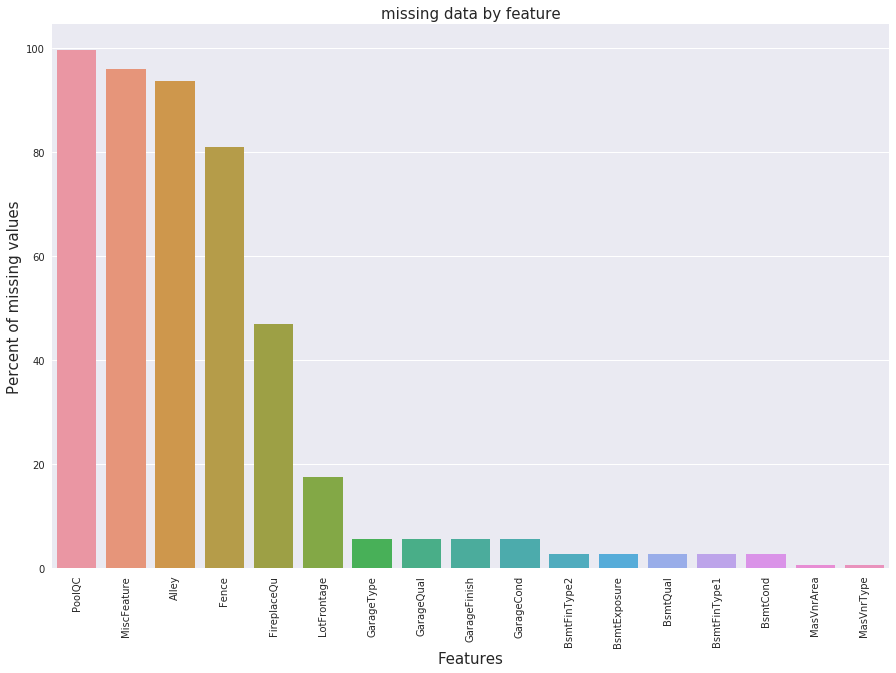

In [32]:
#plot non zero percentage of missing values of train features
f, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation='90')
sns.barplot(x=train_miss_columns.index, y=train_miss_columns)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('missing data by feature', fontsize=15)

#### <div style="font-size:120%;margin-left: 50px;"> <span class="label label-danger">II.3.2</span> <span class="label label-danger">Cleaning Meaningful NA(s) in categorical columns</span></div>

<div class="alert alert-info">
**Not all `NA`s imply missing data!**
<br><br>
There are 44 *categorical features*; out of which 15 sometimes have the value 'NA'. 
<br> The columns are listed below.<br>
1. `Alley`<br>
2. `BsmtQual`<br>
3. `BsmtCond`<br>
4. `BsmtExposure`<br>
5. `BsmtFinType1`<br>
6. `BsmtFinType2`<br>
7. `FireplaceQu`<br>
8. `GarageType`<br>
9. `GarageFinish`<br>
10. `GarageQual`<br>
11. `GarageCond`<br>
12. `PoolQC`<br>
13. `Fence`<br>
14. `MiscFeature`<br>
15. `MasVnrType`<br><br>
Here, `NA` implies that a specific house does not have that corresponding feature and this information is very much available. (So, it should not be considered that such data are missing)<br>
This specific meaning should be considered while categorizing the houses.<br>
So, the `NA` values for these columns have to be replaced with a suitable string (in order to avoid these records from being dropped) such that the category of houses without a facility of Garage (as an example) is not missed during analysis.

<br>The below code snippet replaces these meaningful `NA`s in *categorical columns* with a string: `featureAbsent` in both the train and test dataframes.
</div>

In [33]:
#All categorical features with at least one NA
is_NA = categorical_df.isna().any()

#categorical features that have NAs
cat_NA = list(is_NA.index.where(is_NA.values == True).dropna())
print("Categorical features that have NAs : \n", cat_NA)

categorical_df[categorical_df.isna()]='FeatureAbsent'

#Updating train_df
train_df[categorical_features]=categorical_df

#replacing NAs in test_df by featureAbsent
categorical_test_df=test_df[qualitative]
categorical_test_df[categorical_test_df.isna()]='featureAbsent'
test_df[categorical_features]=categorical_test_df

Categorical features that have NAs : 
 ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'MasVnrType', 'MiscFeature', 'PoolQC']


####  <div style="font-size:120%; margin-left: 50px;"> <span class="label label-danger">II.3.3</span> <span class="label label-danger">Cleaning Meaningful NA(s) in numerical columns</span></div>

<div class='alert alert-info'>

For `NA`s in numerical columns, cleaning is done by filling the `NA` with the median value of the column over the dataset (for both train and test dataframes) in order to least affect the statistics.

</div>

In [34]:
#All numerical features with at least one NA
is_NA = numerical_df.isna().any()

#categorical features that have NAs
num_NA = list(is_NA.index.where(is_NA.values == True).dropna())
print("Numerical features that have NAs : \n", num_NA)

# Handle remaining missing values for numerical features by using median as replacement
train_df = train_df.fillna(train_df.median())
test_df = test_df.fillna(test_df.median()) 


Numerical features that have NAs : 
 ['GarageYrBlt', 'LotFrontage', 'MasVnrArea']


### <a id='II.4'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">II.4</span> <span class="label label-success">Categorical features visualization</span></div>



<div class='alert alert-info'>

We now move on to visualize categorical data after cleaning. 
<br>Since `NA` replacement was done, we are now able to identify that a significant number of houses actually lack some features. 
<br>Consider the feature `Alley` as an example: a large percentage of houses do not have an `Alley` and for the feature `PoolQC` we can observe that almost none of the houses have this feature!

</div>

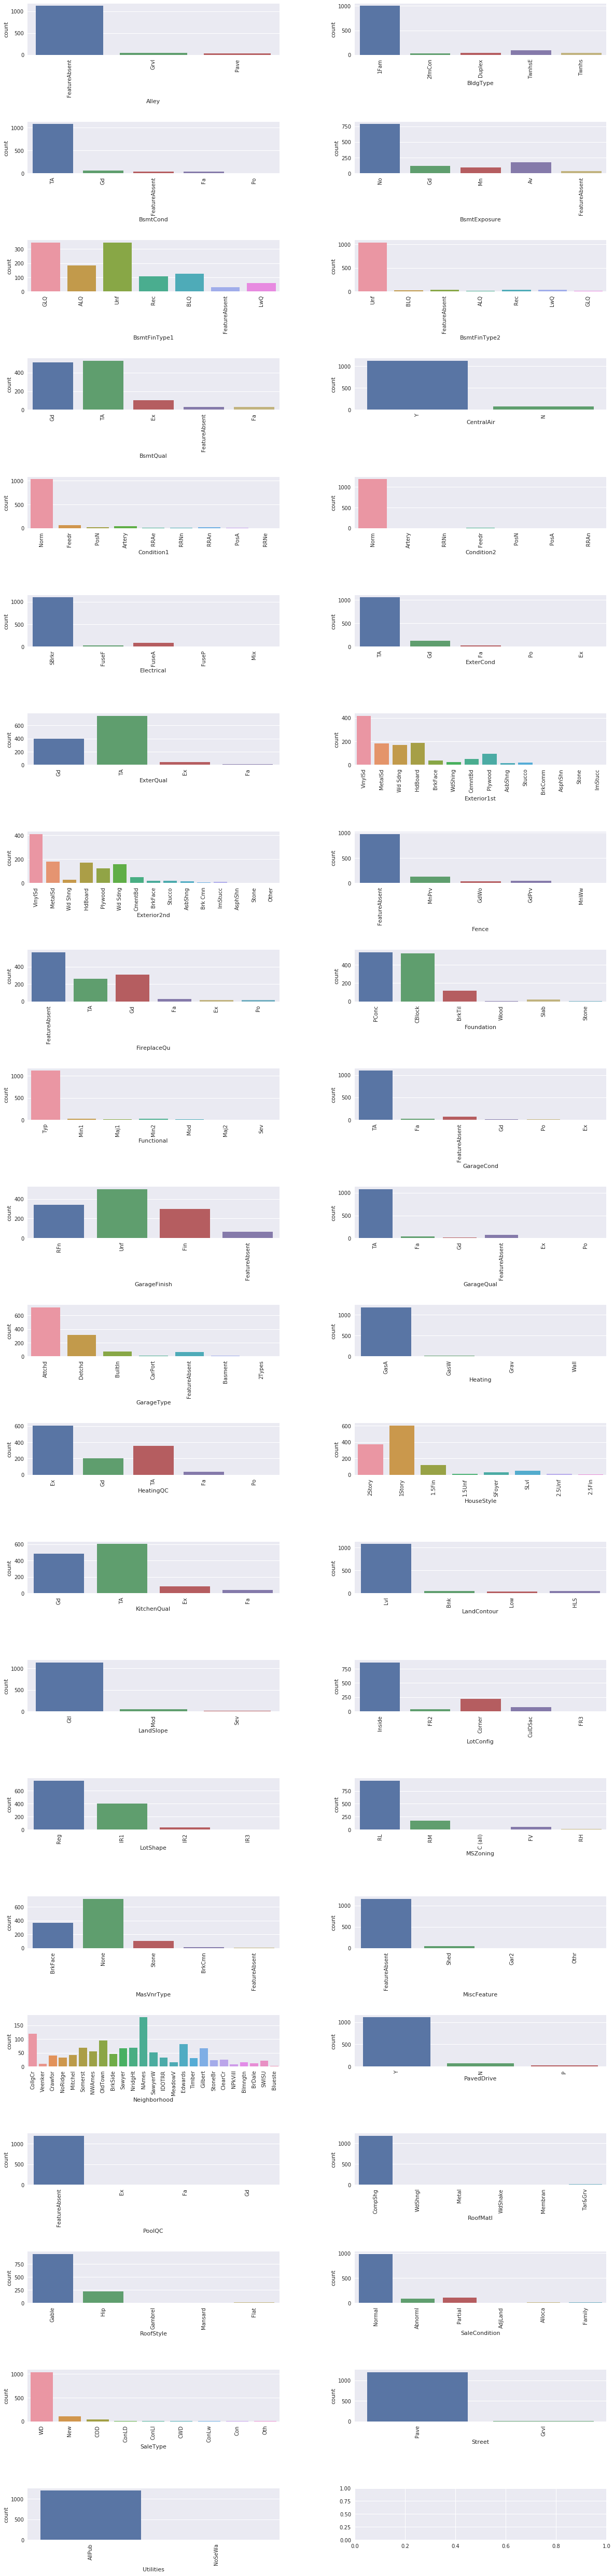

In [35]:
n_rows = 22

fig, axs = plt.subplots(n_rows,2, figsize = (20,90))
fig.subplots_adjust(hspace=1.3, wspace=.3)

for k in axs:
    for i,j in zip(categorical_features, axs.flat):
        g = sns.countplot(x=i, data=categorical_df, ax=j)
        plt.setp(j.get_xticklabels(), rotation=90)


<div class="label label-warning">COMMENT:</div>

<p style="padding-left:15em;"> <strong>The graph above represents the count of each categorical feature's values.</strong></p>
<li> First of all, it allows us to have a better visualization of the values of each categorical feature! 
</li>
<li>
Second of all, we can see if there are missing values and have an overview about its proportion compared to the other values. This is useful especially in the case of `PoolQC` which is an interesting feature to deal with later! 
<li>
Last but not least, we can easily identify the dominant values and the least present ones (`Utilities`,`Street`, `Electrical` and many other features are in this case!)
</li>









<div class='alert alert-info'>
We now visualize categorical features with box plots which serve as an efficient mechanism to understand `SalePrice` variations (even incuding the minimum, maximum, median, and quartile values) with respect to feature value.
</div>

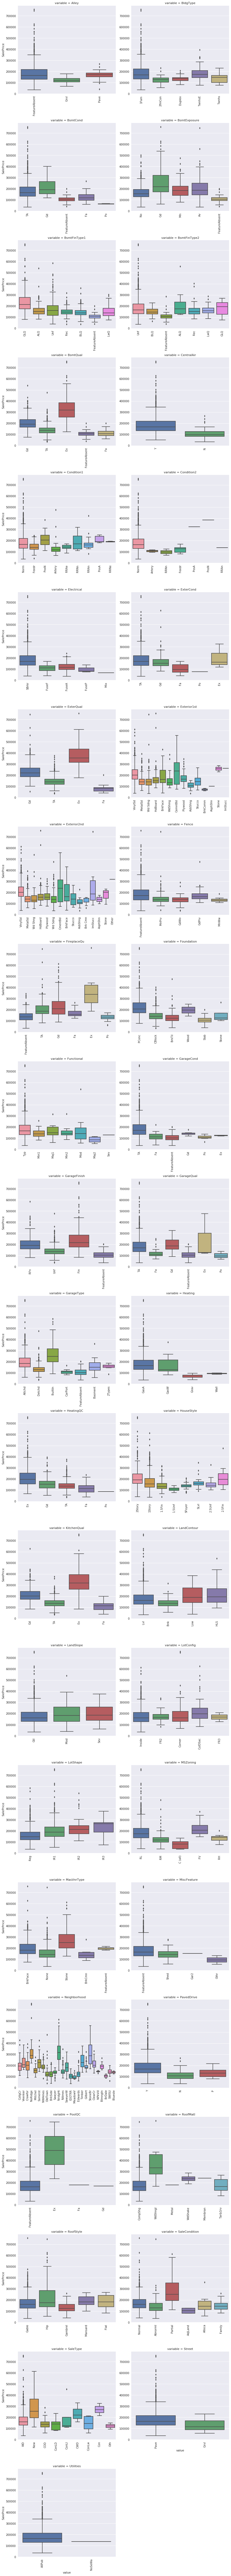

In [36]:
import seaborn as sns
#Another code to plot the categorical features

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(train_df, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=6)
g = g.map(boxplot, "value", "SalePrice")



<div class="label label-warning">INFERENCE:</div>
<p style="padding-left:15em;"><strong>The graph above represents the boxplot graphs of each categorical feature.</strong></p>
The interpretation of the graph is based on the understanding of the boxplot itself.
<br>
<li>Given a feature, comparing the respective medians, and comparing their locations, gives us an overview of the average price of houses having this feature value </li>

<li>For each feature, comparing the interquartile ranges, in other terms, the box lengths, allows us to better see and compare the dispersion of the prices between the feature values.</li>

<li>An other way to have an idea about the dispersion is to Look at the overall spread as shown by the adjacent feature values.</li>

<li>An other important aspect about our data is to look for potential outliers, which are represented by the isolated points above the upper adjacent value or below the lower adjacent value of a given feature value</li>


### <a id='II.5'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">II.5</span> <span class="label label-success"> Understanding the dependencies between categorical_features and SalePrice</span></div>



starting time: 1526913395.554991
--- 51 min and 41.016478 seconds ---


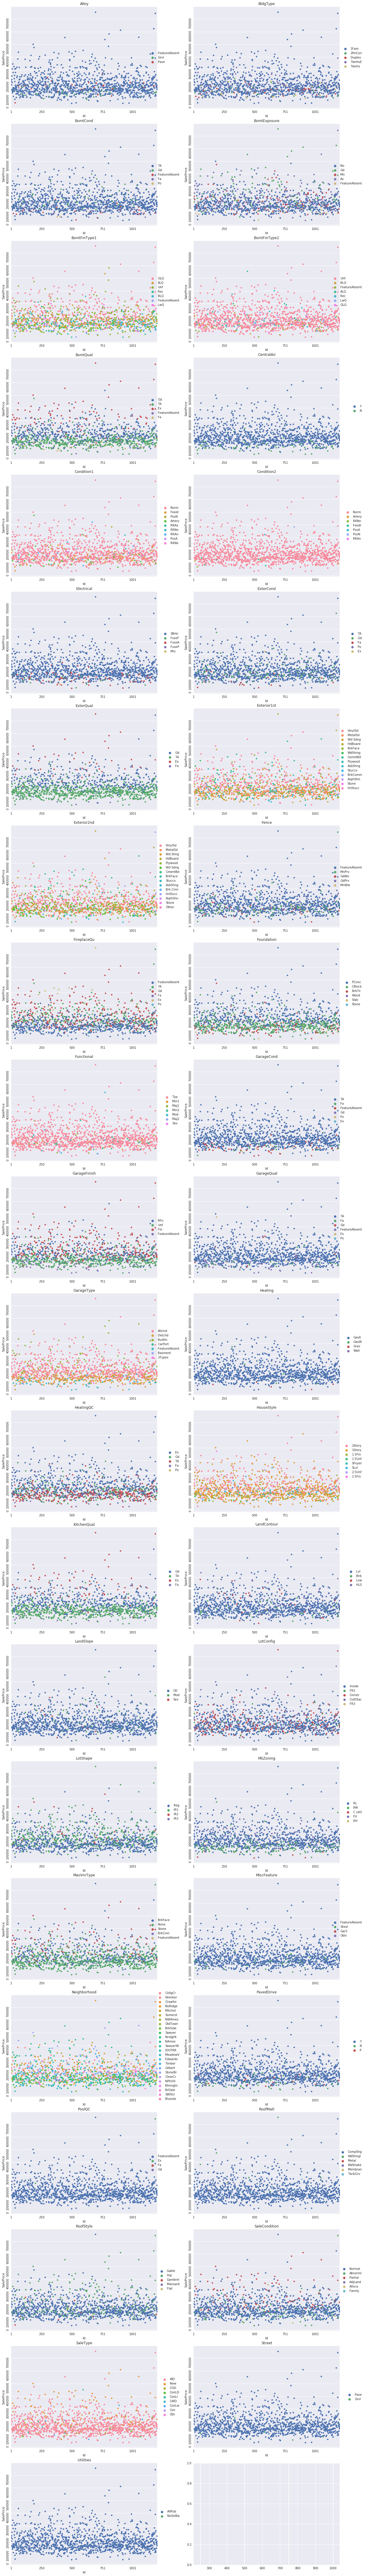

In [37]:
import time
start_time = time.time()

#22 rows and 2 colomns
fig, axs = plt.subplots(22,2, figsize = (20,160))
fig.subplots_adjust(hspace=.15, wspace=.25)
index_samples=[1,250,500,750,1000,1200]

for i,j in zip(categorical_features, axs.flat):
    sns.swarmplot(x=train_df['Id'], y=train_df['SalePrice'], hue=train_df[i],ax=j, data=train_df) 
    j.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1) #move the legends outside the graph, on the right and in the center
    j.set_title(i) #set the titles
    plt.setp(j.get_yticklabels(), rotation=90) #rotate the price labels

    #vertical grid
    for xc in index_samples[1:-1]:
        plt.axvline(x=xc, color='w', linestyle='-')
    
    
    xticks = j.xaxis.get_major_ticks()
    
    #Sample the id to display on the xaxis, otherwise there will be an overlay between id values
    for i in range(len(xticks)):
        xticks[i].label1.set_visible(False)
        if i in index_samples:
            xticks[i-1].label1.set_visible(True)
        
    #take the xtick off
    #j.tick_params(labelbottom='off')

    
duration= time.time() - start_time
print("--- %d min and %f seconds ---" % (duration//60 , duration-60*(duration//60)))



<div class="alert alert-warning">
<div class="label label-warning">INFERENCE:</div>
The graph above represents a categorical scatterplot, it gives a better representation of the distribution of values.
<br><br>
<li>For each categorical feature, each color represents a value of the given categorical feature</li>
<li>We can see that the prices are concentrated between 100k and 200k for all the categorical features, with outliers outside the interval. </li>
<li>Also, some value distributions of some categorical features have an almost uniform distribution with respect to the SalePrice (Exterior2nd) while other values have a clearly more limited range of SalePrice values </li>
<li>We can also see the dominant values of some categorical features (Functional), the absent values (PoolQC), and also the approximately equal proportion of values (Neighborhood) </li>
<li> An other interesting fact is that if we define an average price for a each value of a categorical feature, in some case we can easily compare them (KitchenQual, LotShape)</li>
</div>

## <a id='III.'></a> <h2 style="text-align=center; font-size=240"> <span class="label label-info" style="text-align=center;" >III</span>  <span class="label label-info" style="text-align=center;">Defining a modeling approach to the problem </span>  </h2> 

### <a id='III.1'></a><div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">III.1</span> <span class="label label-success">Encoding</span></div>

<div class='alert alert-warning'>
A categorical variable of K categories is usually entered in a regression analysis as a sequence of K-1 variables, e.g. as a sequence of K-1 dummy variables. Categorical variables (wiki) are those that represent a fixed number of possible values, rather than a continuous number.  Each value assigns the measurement to one of those finite groups, or categories.  They differ from ordinal variables in that the distance from one category to another ought to be equal regardless of the number of categories, as opposed to ordinal variables which have some intrinsic ordering. 
 
1.       Ordinal: low, medium, high
2.      Categorical: Georgia, Alabama, South Carolina, New York
The machine learning algorithms we will later use tend to want numbers, and not strings, as their inputs so we need some method of coding to convert them. <br>
Our objective is to code categorical variables into numbers. A straightforward way of doing this is to just assign an integer to each category (assuming we know all of the possible categories up front).  
<br> After trying the below category encoders:<br><br>
- Backward Difference<br> 
- Ordinal<br> 
- Dummy<br> 
- Helmert<br> 
- Polynomial<br>
- Label encoding<br>
We use a straightforward encoding method Label encoding which simply convert each value in a column to a number. 

</div>

<span class="label label-danger" style="font-size:100%;">Label encoder</span>

In [38]:

# Get a new clean dataframe by concatenating train_df and test_df
all_data=pd.concat((train_df.iloc[:,1:-1], test_df.iloc[:,1:]))
obj_df = all_data.copy()


# process columns, apply LabelEncoder to categorical features
for c in obj_df.columns:
    lbl = preprocessing.LabelEncoder() 
    lbl.fit(list(obj_df[c].values)) 
    obj_df[c] = lbl.transform(list(obj_df[c].values))
    
    
obj_df.iloc[20:,:].head(20)

2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  \
20       372          0      0             4         0         4   
21         0          0      1             3         0         4   
22         0          0      0             3         0         4   
23         0          0      0             3         4         4   
24         0          0      0             3         0         4   
25         0          0      0             3         0         4   
26         0          0      0             3         0         4   
27         0          0      0             3         0         4   
28         0          0      0             2         0         4   
29         0          0      0             1         0         4   
30       128          0      2             3         0         4   
31         0          0      0             3         0         4   
32         0          0      0             3         0         4   
33         0          0      0             4         0         4   
34         0          0      0             2         4         4   
35       389          0      0             4         0         4   
36         0          0      0             3         0         4   
37         0          0      0             3         0         4   
38         0          0      0             3         0         4   
39         0          0      0             2         2         1   

    BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1   ...    SaleCondition  \
20             0           0           0             6   ...                5   
21             4           0           0             6   ...                4   
22             4           0           0             6   ...                4   
23             4         429           0             3   ...                4   
24             3          51         116             5   ...                4   
25             4           0           0             6   ...                4   
26             3          76          90             1   ...                4   
27             4         557           0             3   ...                4   
28             2         573           0             1   ...                4   
29             4           0           0             6   ...                4   
30             4           0           0             6   ...                4   
31             4           0           0             6   ...                4   
32             0           0           0             6   ...                4   
33             4         503           0             5   ...                4   
34             4         538           0             3   ...                4   
35             0           0           0             6   ...                4   
36             4           0           0             6   ...                4   
37             4         555           0             5   ...                4   
38             4         371           0             3   ...                0   
39             1           0           0             2   ...                1   

    SaleType  ScreenPorch  Street  TotalBsmtSF  Utilities  WoodDeckSF  \
20         6            0       1          380          0         154   
21         8            0       1           55          0           0   
22         8            0       1          658          0         100   
23         8            0       1          300          0          46   
24         8            0       1          314          0         239   
25         8            0       1          585          0           0   
26         8            0       1          203          0         141   
27         8            0       1          639          0           0   
28         8            0       1          551          0         180   
29         8            0       1           21          0          16   
30         8            0       1           59          0           0 

## <a id='IV.'></a> <h2 style="text-align=center; font-size=240"> <span class="label label-info" style="text-align=center;" >IV</span>  <span class="label label-info" style="text-align=center;">Building statistical models</span>  </h2> 




### <a id='IV.1'></a> <a id='IV.1'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">IV.1</span> <span class="label label-success">LINEAR REGRESSION</span></div>



<div class='alert alert-info'>
Defining a function to evaluate our models score by cross-validation. The minus is used because the method "neg_mean_squared_error" gives negatives values.
</div>

In [39]:
#defining the function 
def rmse_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_val, Y_val, scoring="neg_mean_squared_error", cv = 10))
    return rmse

In [40]:

X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(obj_df.iloc[:train_df.shape[0],:], train_df['SalePrice'], test_size = 0.2, random_state = 5)
#X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(numerical_df.iloc[:,0:-1], numerical_df['SalePrice'], test_size = 0.2, random_state = 5)

Y_train = np.log(Y_train)
Y_val = np.log(Y_val)

print("X_train.shape", X_train.shape)
print("X_val.shape", X_val.shape)
print("Y_train.shape", Y_train.shape)
print("Y_val.shape", Y_val.shape)

X_train.shape (959, 75)
X_val.shape (240, 75)
Y_train.shape (959,)
Y_val.shape (240,)


Score: 0.8816490513393911


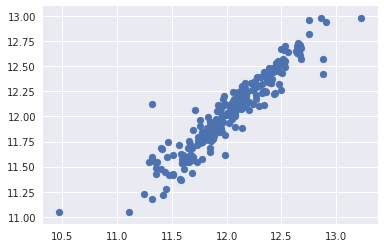

Root mean squared error: 0.13194705
Variance score: 0.88164905


In [41]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
model=regr.fit(X_train, Y_train)

# Make predictions using the validation set
Saleprice_pred = regr.predict(X_val)


print("Score:", model.score(X_val, Y_val) )
    
# The line / model
plt.scatter(Y_val, Saleprice_pred)
plt.show()

#  The root mean squared error
print("Root mean squared error: %.8f"
       % np.sqrt(mean_squared_error(Y_val, Saleprice_pred)))
#Explained variance score: 1 is perfect prediction
print('Variance score: %.8f' % r2_score(Y_val, Saleprice_pred))


### <a id='IV.2'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">IV.2</span> <span class="label label-success">XGBOOST</span></div>



<div class='alert alert-warning'>
XGBoost is one of the fastest implementations of gradient boosted trees.
Boosting is a learning algorithm that fits data using multiple simpler models, the so called base learners/weak learners. It does this by adaptively fitting the data by using the same or slightly different in parameter setting’s base learners. Here the predictors are made sequentially. This technique employs the logic in which the subsequent predictors learn from the mistakes of the previous predictors. <br>
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.
 <br>Although tree methods have limited predictive power, boosting improves their predictability. Tree methods work by partitioning the feature space into different set of rectangular and non-overlapping regions, into which a simple model is fit.
The time efficiency of XGBoost is attributed to the fact that it handles one of the major inefficiencies of gradient boosting which is the ‘loss’ for all possible splits to create a new branch; by applying the penalization of the leaf weights as the complexity measurement. 
 <br>
The significant parameters that affect the performance of XGBoost are:
<ul>
<li>`n_estimators`: This is how many subtrees h will be trained. Introducing early stopping plays an important role in preventing overfitting.
Since we use a parameter searcher `GridSearchCV` we find the best `n_estimator` by defining a scoring method that uses the `best_ntree_limit`.
<li>`max_depth` is the maximum tree depth each individual tree h can grow to. The default value of 3 is a good starting point.
<li>`learning rate` each weight (in all the trees) will be multiplied by this value, so that the updates to the weights are updated gradually to obtain optimum values for prediction.
    </ul>
</div>

In [42]:
cv_params = {'max_depth': [1,3,5,7], 'min_child_weight': [1,3,5], 'learning_rate': [0.1, 0.2, 0.15, 0.05]}
ind_params = {'n_estimators': 600, 'seed':0, 'subsample': 0.8, 
             'objective': 'reg:linear'}
optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), 
                            cv_params, 
                             scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)


In [43]:
#fitting xgboost model
xgboost_model= optimized_GBM.fit(X_train, Y_train)

In [44]:
#printing the list of scores for each set of parameter to choose the best parameters
optimized_GBM.grid_scores_

[mean: -0.01518, std: 0.00176, params: {'min_child_weight': 1, 'learning_rate': 0.1, 'max_depth': 1},
 mean: -0.01491, std: 0.00165, params: {'min_child_weight': 3, 'learning_rate': 0.1, 'max_depth': 1},
 mean: -0.01522, std: 0.00188, params: {'min_child_weight': 5, 'learning_rate': 0.1, 'max_depth': 1},
 mean: -0.01544, std: 0.00258, params: {'min_child_weight': 1, 'learning_rate': 0.1, 'max_depth': 3},
 mean: -0.01532, std: 0.00243, params: {'min_child_weight': 3, 'learning_rate': 0.1, 'max_depth': 3},
 mean: -0.01513, std: 0.00240, params: {'min_child_weight': 5, 'learning_rate': 0.1, 'max_depth': 3},
 mean: -0.01557, std: 0.00245, params: {'min_child_weight': 1, 'learning_rate': 0.1, 'max_depth': 5},
 mean: -0.01529, std: 0.00222, params: {'min_child_weight': 3, 'learning_rate': 0.1, 'max_depth': 5},
 mean: -0.01567, std: 0.00253, params: {'min_child_weight': 5, 'learning_rate': 0.1, 'max_depth': 5},
 mean: -0.01658, std: 0.00298, params: {'min_child_weight': 1, 'learning_rate': 0.

In [45]:
#storing the train data set in a DMatrix object
xgdmat = xgb.DMatrix(X_train, Y_train)

In [46]:
#defining our parameters
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'n_estimators': 100,
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':5} 

# Grid Search CV optimized settings
cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['rmse','error'], 
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [47]:
#printing the last 5 smallest errors
cv_xgb.tail(5)

test-error-mean  test-error-std  test-rmse-mean  test-rmse-std  \
202       -11.023491         0.01999        0.126387       0.006995   
203       -11.023491         0.01999        0.126438       0.007010   
204       -11.023491         0.01999        0.126357       0.007023   
205       -11.023491         0.01999        0.126326       0.007043   
206       -11.023491         0.01999        0.126255       0.007010   

     train-error-mean  train-error-std  train-rmse-mean  train-rmse-std  
202        -11.023462         0.004989         0.055844        0.001399  
203        -11.023462         0.004989         0.055630        0.001388  
204        -11.023462         0.004989         0.055492        0.001417  
205        -11.023462         0.004989         0.055361        0.001384  
206        -11.023462         0.004989         0.055212        0.001366

In [48]:
#training the model with the best num_boost_round found above
final_gb = xgb.train(our_params, xgdmat, num_boost_round = 256)

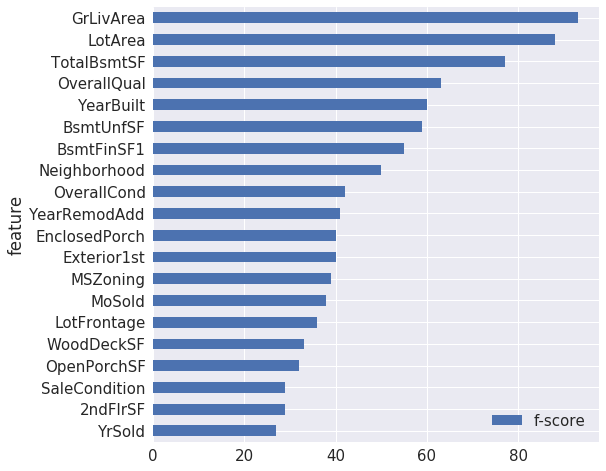

In [49]:

#plot top 20 important#plot to 
importance = final_gb.get_fscore()
importance_df = pd.DataFrame({'feature':list(importance.keys()), 'f-score':list(importance.values())})
importance_df = importance_df.sort_values('f-score')[-20:]
sns.set(font_scale = 1.5)
importance_df.plot(kind = 'barh', x = 'feature', figsize = (8,8))

Text(0.5,0.98,'Test Actual vs. Prediction')

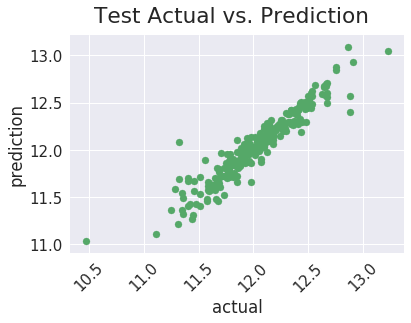

In [50]:
xgdmat_test = xgb.DMatrix(X_val)
pred_test = final_gb.predict(xgdmat_test)
#Test actual vs prediction
plt.scatter(Y_val, pred_test,  color='g')
plt.xlabel('actual')
plt.xticks(rotation = 45)
plt.ylabel('prediction')
plt.suptitle('Test Actual vs. Prediction')

In [51]:
from sklearn.metrics import accuracy_score
#pred_test[pred_test > 0.5] = 1
#pred_test[pred_test <= 0.5] = 0
predictions = [round(value) for value in pred_test]
y_val=[round(value) for value in Y_val]
accuracy_score( y_val, predictions), 1-accuracy_score(y_val, predictions)

(0.9125, 0.08750000000000002)

In [52]:
res0 = np.sqrt(np.mean((pred_test-Y_val)**2))
print("RMSE Mean on train data:",res0)

# res1 = rmse_test(xgboost_model)
# print("RMSE Mean on test data:",res1.mean())
# print("RMSE Min on test data: ",res1.min())

RMSE Mean on train data: 0.12353974716868114


<span class="label label-danger" style="font-size:100%;">REGULARZATION</span>

<div class='alert alert-info'>

Regularization is a form of regression that constrains or regularizes the coefficient estimates towards zero. It prevents overfitting by constraining the complexity of the model learnt.
The loss function in regularization fitting is the residual sum of squares (RSS). The coefficients are chosen such that they minimize the loss. Regularization handles noisy training data by constraining the learned estimates towards zero.
</div>


### <a id='IV.3'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">IV.3</span> <span class="label label-success"> BAYESIAN RIDGE REGRESSION</span></div>



<div class='alert alert-info'>
Ridge regression performs L2 regularization where it adds a penalty equivalent to the square of magnitude of coefficients `alpha`.
This optimization is done to minimize the sum of RSS and alpha.
Here, $\alpha$ is the tuning parameter which balances the amount of emphasis given to minimising RSS vs minimising sum of square of coefficients. It can take various values:<br>
When $\alpha = 0$; the objective becomes same as simple linear regression. When $\alpha = \infty$, the coefficients are zero which will inturn make the objective infinite.<br>
A magnitude of $\alpha$ between 0 and $\infty$ determines the weight assigned to the objective.
Ridge is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high features, say in millions, as it will pose computational challenges.
</div>


Score: 0.8886104672995141


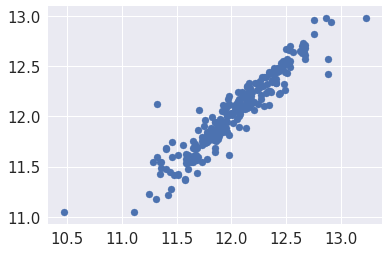

Root mean squared error: 0.13194705
Variance score: 0.88164905


In [53]:

# Create linear regression object
regBR = linear_model.BayesianRidge(alpha_2=1)

# Train the model using the training sets
model = regBR.fit(X_train, Y_train)

# Make predictions using the testing set
Saleprice_pred_baye = np.exp(regBR.predict(X_val))


print("Score:", model.score(X_val, Y_val) )
    
## The line / model
plt.scatter(Y_val, Saleprice_pred)
plt.show()

#  The root mean squared error
print("Root mean squared error: %.8f"
       % np.sqrt(mean_squared_error(Y_val, Saleprice_pred)))
#Explained variance score: 1 is perfect prediction
print('Variance score: %.8f' % r2_score(Y_val, Saleprice_pred))



### <a id='IV.3'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">IV.3</span> <span class="label label-success"> LASSO MODEL</span></div>

<div class='alert alert-info'>
LASSO stands for *Least Absolute Shrinkage and Selection Operator*. Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimisation objective.
Here, $\alpha$ works similar to that of ridge where it can take various values and provide a trade-off between balancing RSS and magnitude of coefficients.<br>
LASSO provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.<br><br>
The advantage of LASSO over Ridge is that, along with shrinking coefficients, LASSO performs feature selection as well. 
<br>Since some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model. With Ridge, it includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity.
</div>


In [54]:
#now create our object
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], selection='random', normalize=True, max_iter=15000).fit(X_train, Y_train)
res1 = rmse_test(model_lasso)

#test data RMSE
print("RMSE Mean on test data:",res1.mean())
print("RMSE Min on test data: ",res1.min())

RMSE Mean on test data: 0.13465802554186584
RMSE Min on test data:  0.08322676716542388


In [55]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 26 variables and eliminated the other 49 variables


Text(0.5,1,'Coefficients in the Lasso Model')

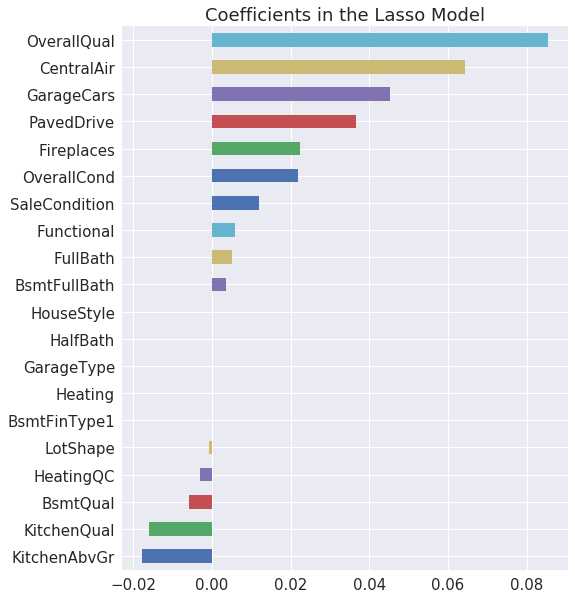

In [56]:
# plotting feature importances!
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

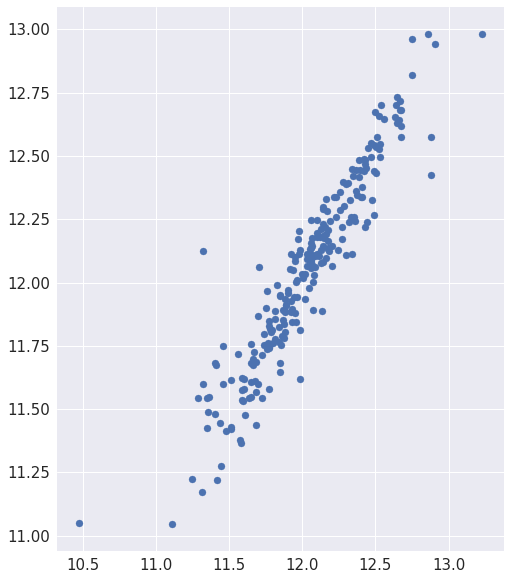

In [57]:
# Make predictions using the testing set
Saleprice_pred_lasso = np.exp(model_lasso.predict(X_val))
## The line / model
plt.scatter(Y_val, Saleprice_pred)
plt.show()

### <a id='IV.5'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">IV.5</span> <span class="label label-success"> RANDOM FORESTS</span></div>



<div class='alert alert-warning'>
**Random Forest Regressor** algorithm works as follows:<br><br>
At every node, all of the features are evaluated for the best split. A best split is the one that gives the least weighted mean square error between actual price of the samples and the predicted price in the nodes it split into. The predicted price is just the average of the prices of all the samples in that node. <br>
Each node always splits into two other nodes. The parameters for the random forest regressor are as follows:
<ul>
<li>The depth of tree (levels) can be specified in scikit-learn for `RandomForestRegressor` as `max_depth`. <br>
<li>`min_samples_leaf` is the minimum number of samples that must be present in each node of the tree. This is specified to limit overfitting. If a large number is provided, the tree will only split such that the final leaf nodes contain at least <li>`min_samples_leaf` number of samples. <br>
<li>`max_features` is another parameter that can be specified to limit overfitting. If `max_features` is 0.5, only a random half of all the features are considered and evaluated for finding the best split. <br>
<li>`n_estimators` is the parameter to specify number of trees. It is always better to have a large number of trees but it may become computationally expensive. It is normal to have hundreds of trees. When analyzing and tuning for the hyperparameters, usual practice is to use 10–40 trees. <br>
<li>`n_jobs` is the number of cores of CPU the algorithm runs upon to parallelize. A value of -1 means that the algorithm uses all the available CPU cores. <br>
    </ul>
</div>

In [58]:
#defining and fitting the random forest model
regRF = RandomForestRegressor()
modelRF = regRF.fit(X_train, Y_train)


Score: 0.8490315316583346


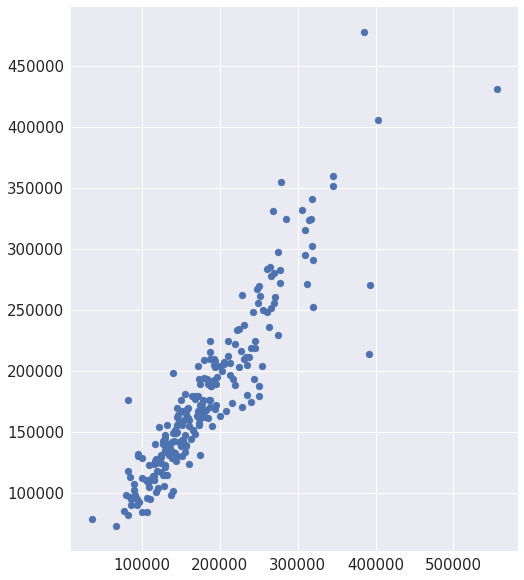

RMSE Mean on test data: 0.16687496887707526
RMSE Min on test data:  0.10800129444011751


In [59]:
#making predictions using the random forest model
Sale_Price_Pred_RF = np.exp(regRF.predict(X_val))

#printing the score
print("Score:", modelRF.score(X_val, Y_val) )
    
## The line / model
plt.scatter(np.exp(Y_val), Sale_Price_Pred_RF)
plt.show()

#RMSE on validation data
rootMeanSquaredError = rmse_test(modelRF)
print("RMSE Mean on test data:",rootMeanSquaredError.mean())
print("RMSE Min on test data: ",rootMeanSquaredError.min())

## <a id='V.'></a> <h2 style="text-align=center; font-size=240"> <span class="label label-info" style="text-align=center;" >V</span>  <span class="label label-info" style="text-align=center;">Validate the outcome of the models</span>  </h2> 




### <a id='V.1'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">V.1</span> <span class="label label-success"> APPLYING LASSO MODEL</span></div>




<div class='alert alert-info'>
Lasso implements L1 regularization which prevents overfitting. The  advantage of this method is that along with shrinking coefficients, LASSO performs feature selection as well. 
Although we see a better rmse for XGBoost than for Lasso, we choose to retain lasso because of its ability to prevent overfitting; which should be considered as a possibility when used for predicting unknown test data.
</div>

In [60]:
#extracting the test data from all data created before
X_test = obj_df.iloc[train_df.shape[0]:,:]

#using lasso
Saleprice_Pred_lasso = np.exp(model_lasso.predict(X_test))


### <a id='V.2'></a> <div style="font-size:120%;margin-left: 25px;"> <span class="label label-success">V.2</span> <span class="label label-success"> CREATION THE SUBMISSION FILE</span></div>





In [61]:
#a dictionnary with the Ids and the corresponding predicted SalePrice to generate a DataFrame
d={'Id': test_df['Id'], 'SalePrice': Saleprice_Pred_lasso}
#creating a dataFrame from the dictionnary above
submission_file= pd.DataFrame(data=d)

In [62]:
#saving the submission file in our current directory into a csv file named submission_file.csv (index is set to False to ignore row index)
submission_file.to_csv("submission_file", index=False)